<font size="+4" color="dark Violet"><h1>Capstone Project</h1></font>


<div style='text-align:center; border:2px solid #333; padding:20px; width:500px; margin:0 auto;'><img src='https://upload.wikimedia.org/wikipedia/commons/c/ca/Walmart_logo.svg' alt='Walmart Logo' style='width:100%; max-width:450px; height:auto; display:block; margin:0 auto;'><font size='+3' color='#FFA500'><b>Sales Forecasting</b></font></div>


<font color="#FF8C00"><h2>Problem Statement:</h2></font>

A **<font color="#004080">Retail</font> <font color="#D4A669">Store</font>** that has multiple outlets across the country.

They are facing issues in managing the inventory - to match the demand with respect to supply.


<font color="#A04F0E"><h2>Dataset Information:</h2></font>

You are provided with the <font color="#8C593A">Weekly_Sales</font> data for their various outlets.

The **<font color="#004080">Walmart</font><font color="#FF8C00">.csv</font>** contains <font color="#264C4D">6435 rows</font> and <font color="#264C4D">8 columns.</font>

| Feature Name   | Description                                      |
|----------------|--------------------------------------------------|
| <font color="#264C4D">Stores</font>          | Store number                                     |
| <font color="#1B4E75">Date</font>           | Week of Sales                                    |
| <font color="#8C593A">Weekly_Sales</font>   | Sales for the given store in that week            |
| <font color="#992600">Holiday_Flag</font>   | Indicates if it is a holiday week                 |
| <font color="#D4A669">Temperature</font>    | Temperature on the day of the sale                |
| <font color="#004080">Fuel_Price</font>     | Cost of fuel in the region                        |
| <font color="#6A287E">CPI</font>           | Consumer Price Index                              |
| <font color="#FF5733">Unemployment</font>   | Unemployment Rate                                 |



<font color="orange"><h2>Objectives:</h2></font>

**Analysis**

  > Handle <font color="orange-red">missing values</font> in the dataset.
  
  > Conduct <font color="dark brown">Exploratory Data Analysis (EDA)</font>to reveal data patterns.
  
  > Identify and analyze <font color="dark brown">Outliers</font> to ensure data quality.
  
  > Perform <font color="dark brown">Statistical Analysis</font> for key insights.

**Various  INSIGHTS** 

   > * a.If the  <font color="blue"> Weekly_Sales </font> are affected by the <font color="reddish-orange"> Unemployment</font> Rate,
    * If YES - which Stores are <font color="bright orange "> suffering the most</font>?
   
   > * b.If the <font color="blue"> Weekly_Sales</font> show a <font color=" bluish-green "> Seasonal Trend</font>
     * When and what could be the <font color="bright orange"> timing and reasons</font>?
   
   > * c.Does<font color="orange"> temperature</font> affect the <font color="blue"> Weekly_Sales </font> 
   
   > * d. How is the <font color="rich purple"> Consumer Price Index (CPI) </font> affecting the <font color="blue"> Weekly_Sales</font> of various stores.
   
   > * e. <font color="Green"> TOP Performing</font> Stores based on historical data.
   
   > * f. The <font color="Green"> WORST Performing</font> Stores and how significant is the difference between the highest and lowest performing stores.

     
     
**Predictions**

> * Apply <font color="bluish-green">Predictive Modeling Techniques</font> to forecast Weekly_Sales.
    * Develop models to predict <font color="blue"> Weekly_Sales </font> for each store for the next 12 weeks.



 

<font color="green"><h2>Importting libraries</h2></font>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.preprocessing import StandardScaler


In [2]:
df = pd.read_csv('Walmart.csv')
df.head(10)

Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1  05-02-2010    1643690.90             0        42.31       2.572   
1      1  12-02-2010    1641957.44             1        38.51       2.548   
2      1  19-02-2010    1611968.17             0        39.93       2.514   
3      1  26-02-2010    1409727.59             0        46.63       2.561   
4      1  05-03-2010    1554806.68             0        46.50       2.625   
5      1  12-03-2010    1439541.59             0        57.79       2.667   
6      1  19-03-2010    1472515.79             0        54.58       2.720   
7      1  26-03-2010    1404429.92             0        51.45       2.732   
8      1  02-04-2010    1594968.28             0        62.27       2.719   
9      1  09-04-2010    1545418.53             0        65.86       2.770   

          CPI  Unemployment  
0  211.096358         8.106  
1  211.242170         8.106  
2  211.289143         8.106  
3  211.319643         8.106  
4  211.350143         8.106  
5  211.380643         8.106  
6  211.215635         8.106  
7  211.018042         8.106  
8  210.820450         7.808  
9  210.622857         7.808

In [3]:
df

Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0         1  05-02-2010    1643690.90             0        42.31       2.572   
1         1  12-02-2010    1641957.44             1        38.51       2.548   
2         1  19-02-2010    1611968.17             0        39.93       2.514   
3         1  26-02-2010    1409727.59             0        46.63       2.561   
4         1  05-03-2010    1554806.68             0        46.50       2.625   
...     ...         ...           ...           ...          ...         ...   
6430     45  28-09-2012     713173.95             0        64.88       3.997   
6431     45  05-10-2012     733455.07             0        64.89       3.985   
6432     45  12-10-2012     734464.36             0        54.47       4.000   
6433     45  19-10-2012     718125.53             0        56.47       3.969   
6434     45  26-10-2012     760281.43             0        58.85       3.882   

             CPI  Unemployment  
0     211.096358         8.106  
1     211.242170         8.106  
2     211.289143         8.106  
3     211.319643         8.106  
4     211.350143         8.106  
...          ...           ...  
6430  192.013558         8.684  
6431  192.170412         8.667  
6432  192.327265         8.667  
6433  192.330854         8.667  
6434  192.308899         8.667  

[6435 rows x 8 columns]

<font color="#FF8C00"><h2>Basic EDA and Data Cleaning</font>

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


**Changing the DataTypes**

In [5]:
# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'] , format='%d-%m-%Y')

# Convert 'Holiday_Flag' to boolean
df['Holiday_Flag'] = df['Holiday_Flag'].astype('bool')

# Convert 'Store' to category
df['Store'] = df['Store'].astype('category')

In [6]:
# adding year column to
df['Year'] = df['Date'].dt.year

# adding week column to
df['Week'] = df['Date'].dt.isocalendar().week

# adding month column to
df['Month'] = df['Date'].dt.month
df

Store       Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0        1 2010-02-05    1643690.90         False        42.31       2.572   
1        1 2010-02-12    1641957.44          True        38.51       2.548   
2        1 2010-02-19    1611968.17         False        39.93       2.514   
3        1 2010-02-26    1409727.59         False        46.63       2.561   
4        1 2010-03-05    1554806.68         False        46.50       2.625   
...    ...        ...           ...           ...          ...         ...   
6430    45 2012-09-28     713173.95         False        64.88       3.997   
6431    45 2012-10-05     733455.07         False        64.89       3.985   
6432    45 2012-10-12     734464.36         False        54.47       4.000   
6433    45 2012-10-19     718125.53         False        56.47       3.969   
6434    45 2012-10-26     760281.43         False        58.85       3.882   

             CPI  Unemployment  Year  Week  Month  
0     211.096358         8.106  2010     5      2  
1     211.242170         8.106  2010     6      2  
2     211.289143         8.106  2010     7      2  
3     211.319643         8.106  2010     8      2  
4     211.350143         8.106  2010     9      3  
...          ...           ...   ...   ...    ...  
6430  192.013558         8.684  2012    39      9  
6431  192.170412         8.667  2012    40     10  
6432  192.327265         8.667  2012    41     10  
6433  192.330854         8.667  2012    42     10  
6434  192.308899         8.667  2012    43     10  

[6435 rows x 11 columns]

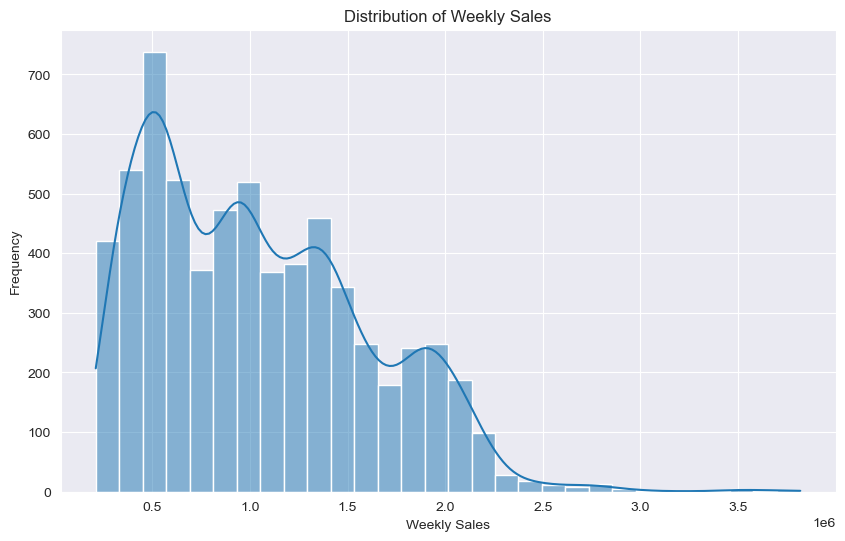

In [7]:
# Visualize Weekly Sales distribution
sns.set_style('darkgrid')
plt.figure(figsize=(10, 6))
sns.histplot(df['Weekly_Sales'], bins=30, kde=True)
plt.title('Distribution of Weekly Sales')
plt.xlabel('Weekly Sales')
plt.ylabel('Frequency')
plt.show()

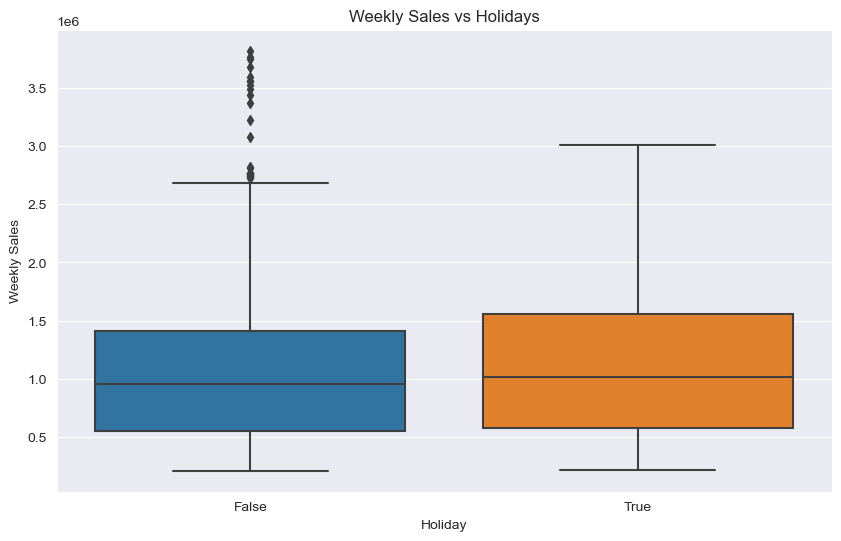

In [8]:
# Visualize Weekly Sales vs Holidays
sns.set_style('darkgrid')
plt.figure(figsize=(10, 6))
sns.boxplot(x='Holiday_Flag', y='Weekly_Sales', data=df)
plt.title('Weekly Sales vs Holidays')
plt.xlabel('Holiday')
plt.ylabel('Weekly Sales')
plt.show()

**Checking for null and duplicate values**

In [9]:
df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
Year            0
Week            0
Month           0
dtype: int64

In [10]:
df.duplicated().sum()

0

<font color="Blue"><h3>Reading the data for elementary Statistics</font>

In [11]:
df.describe()

Weekly_Sales  Temperature   Fuel_Price          CPI  Unemployment  \
count  6.435000e+03  6435.000000  6435.000000  6435.000000   6435.000000   
mean   1.046965e+06    60.663782     3.358607   171.578394      7.999151   
std    5.643666e+05    18.444933     0.459020    39.356712      1.875885   
min    2.099862e+05    -2.060000     2.472000   126.064000      3.879000   
25%    5.533501e+05    47.460000     2.933000   131.735000      6.891000   
50%    9.607460e+05    62.670000     3.445000   182.616521      7.874000   
75%    1.420159e+06    74.940000     3.735000   212.743293      8.622000   
max    3.818686e+06   100.140000     4.468000   227.232807     14.313000   

              Year       Week        Month  
count  6435.000000     6435.0  6435.000000  
mean   2010.965035  25.818182     6.447552  
std       0.797019  14.129201     3.238308  
min    2010.000000        1.0     1.000000  
25%    2010.000000       14.0     4.000000  
50%    2011.000000       26.0     6.000000  
75%    2012.000000       38.0     9.000000  
max    2012.000000       52.0    12.000000

<font color = 'Orange'><h3>Outlier Analysis</font>

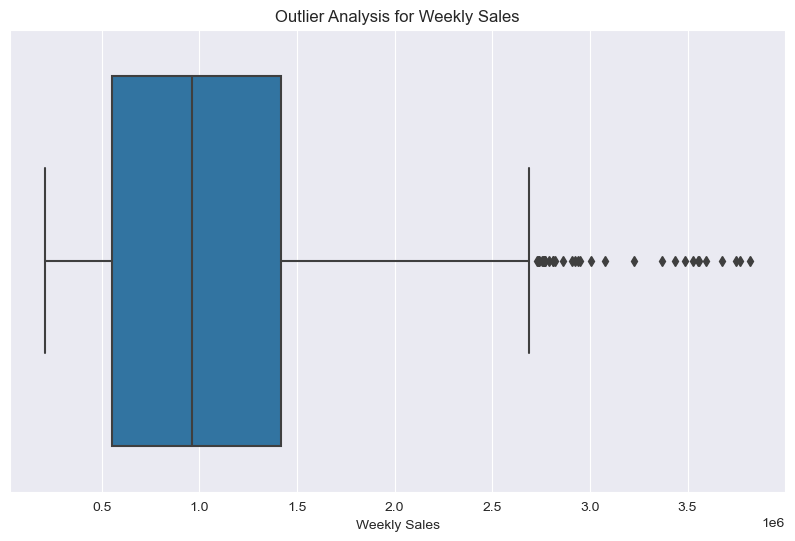

In [12]:
sns.set_style('darkgrid')
plt.figure(figsize=(10, 6))
sns.boxplot(x='Weekly_Sales', data=df)
plt.title('Outlier Analysis for Weekly Sales')
plt.xlabel('Weekly Sales')
plt.show()

In [13]:
Q3 = df['Weekly_Sales'].quantile(0.75)
Q1 = df['Weekly_Sales'].quantile(0.25)
IQR = Q3-Q1
upperLimit = Q3+(1.5*IQR)
lowerLimit = Q1-(1.5*IQR)

In [14]:
# Assuming you have defined 'upperLimit' and 'lowerLimit' earlier

A1 = (df['Weekly_Sales'] <= upperLimit) & (df['Weekly_Sales'] >= lowerLimit)
df = df[A1]


In [15]:
df

Store       Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0        1 2010-02-05    1643690.90         False        42.31       2.572   
1        1 2010-02-12    1641957.44          True        38.51       2.548   
2        1 2010-02-19    1611968.17         False        39.93       2.514   
3        1 2010-02-26    1409727.59         False        46.63       2.561   
4        1 2010-03-05    1554806.68         False        46.50       2.625   
...    ...        ...           ...           ...          ...         ...   
6430    45 2012-09-28     713173.95         False        64.88       3.997   
6431    45 2012-10-05     733455.07         False        64.89       3.985   
6432    45 2012-10-12     734464.36         False        54.47       4.000   
6433    45 2012-10-19     718125.53         False        56.47       3.969   
6434    45 2012-10-26     760281.43         False        58.85       3.882   

             CPI  Unemployment  Year  Week  Month  
0     211.096358         8.106  2010     5      2  
1     211.242170         8.106  2010     6      2  
2     211.289143         8.106  2010     7      2  
3     211.319643         8.106  2010     8      2  
4     211.350143         8.106  2010     9      3  
...          ...           ...   ...   ...    ...  
6430  192.013558         8.684  2012    39      9  
6431  192.170412         8.667  2012    40     10  
6432  192.327265         8.667  2012    41     10  
6433  192.330854         8.667  2012    42     10  
6434  192.308899         8.667  2012    43     10  

[6401 rows x 11 columns]

<font color = 'purple'> <h2> Various INSIGHTS that will give a clear perspective on the following </font>

<font color="#0000CD"><h3>Investigate if Weekly_Sales are influenced by the Unemployment Rate </font>

**checking correaltion between Weekly Sales and Unemployment Rate**

In [16]:
corr = df['Weekly_Sales'].corr(df['Unemployment'])
print('The correaltion between Weekly Sales and Unemployment:',corr)

The correaltion between Weekly Sales and Unemployment: -0.10429750912578394


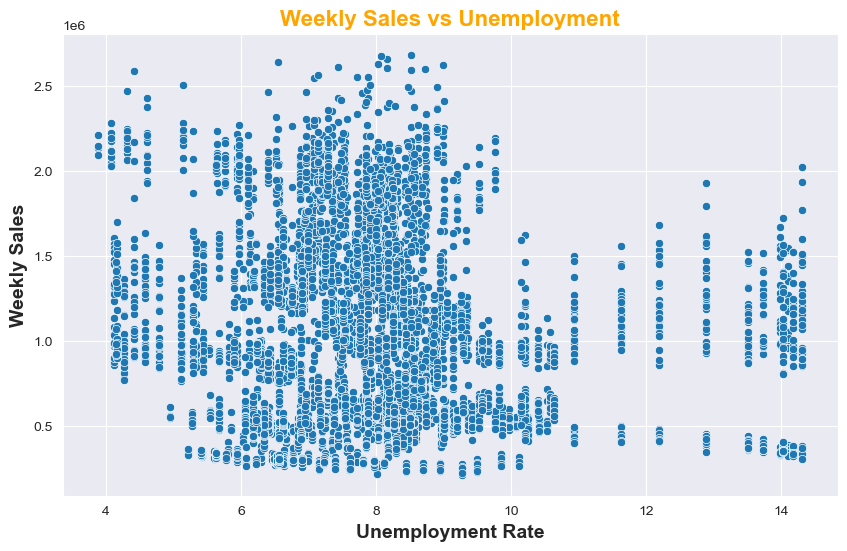

In [17]:
sns.set_style('darkgrid')
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Unemployment',y='Weekly_Sales', data=df)
plt.title('Weekly Sales vs Unemployment',fontsize=16, fontweight='bold',color='Orange')
plt.xlabel('Unemployment Rate',fontsize=14, fontweight='bold')
plt.ylabel('Weekly Sales',fontsize=14, fontweight='bold')
plt.show()

**which Stores are suffering the most?**

In [18]:
most_affected_stores = df.groupby('Store')[['Weekly_Sales', 'Unemployment']].corr().unstack().sort_values(by=('Weekly_Sales', 'Unemployment'))

# Reset the index
most_affected_stores.reset_index(inplace=True)

# Identify the store with the highest negative correlation
store_with_highest_neg_corr = most_affected_stores.loc[most_affected_stores[('Weekly_Sales', 'Unemployment')].idxmin(), 'Store'].astype(int)
print(f"Stores with the Highest Negative Correlation with Unemployment Rate: {store_with_highest_neg_corr}")

Stores with the Highest Negative Correlation with Unemployment Rate:     38
Name: 0, dtype: int32


<font color=" bluish-green "> <h3>Seasonal Trends:</font>

Analyze if <font color="blue"> Weekly_Sales </font> exhibit a seasonal trend.

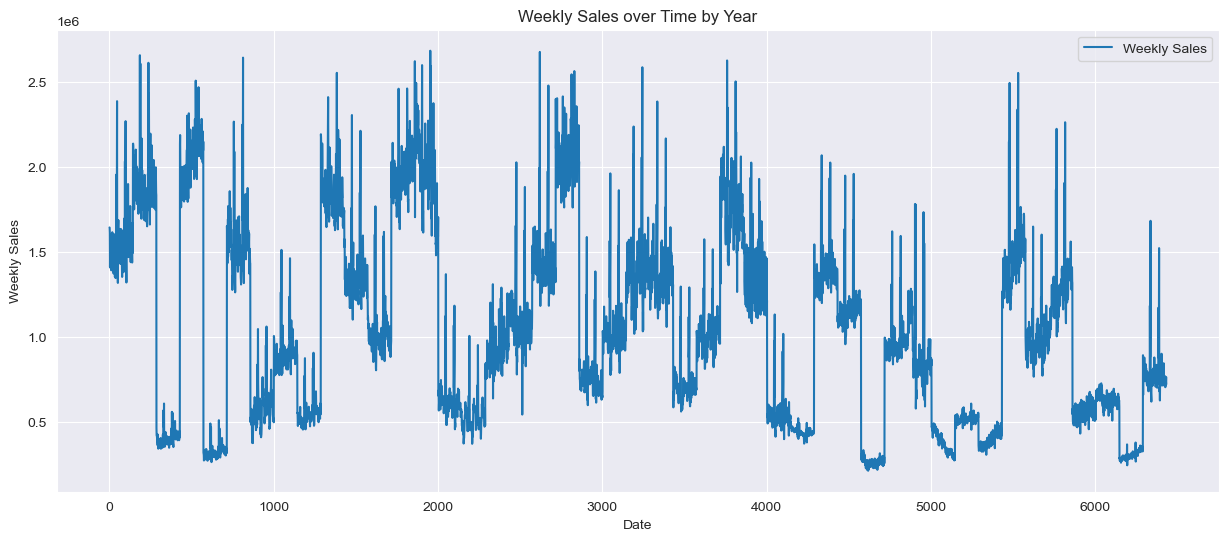

In [19]:
sns.set_style('darkgrid')
plt.figure(figsize=(15, 6))
plt.plot(df['Weekly_Sales'], label='Weekly Sales')
plt.title('Weekly Sales over Time by Year')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.legend()
plt.show()

**Analyze if Weekly_Sales exhibit Trend Component,Seasonal Component,Residual Component,Original Time Series**

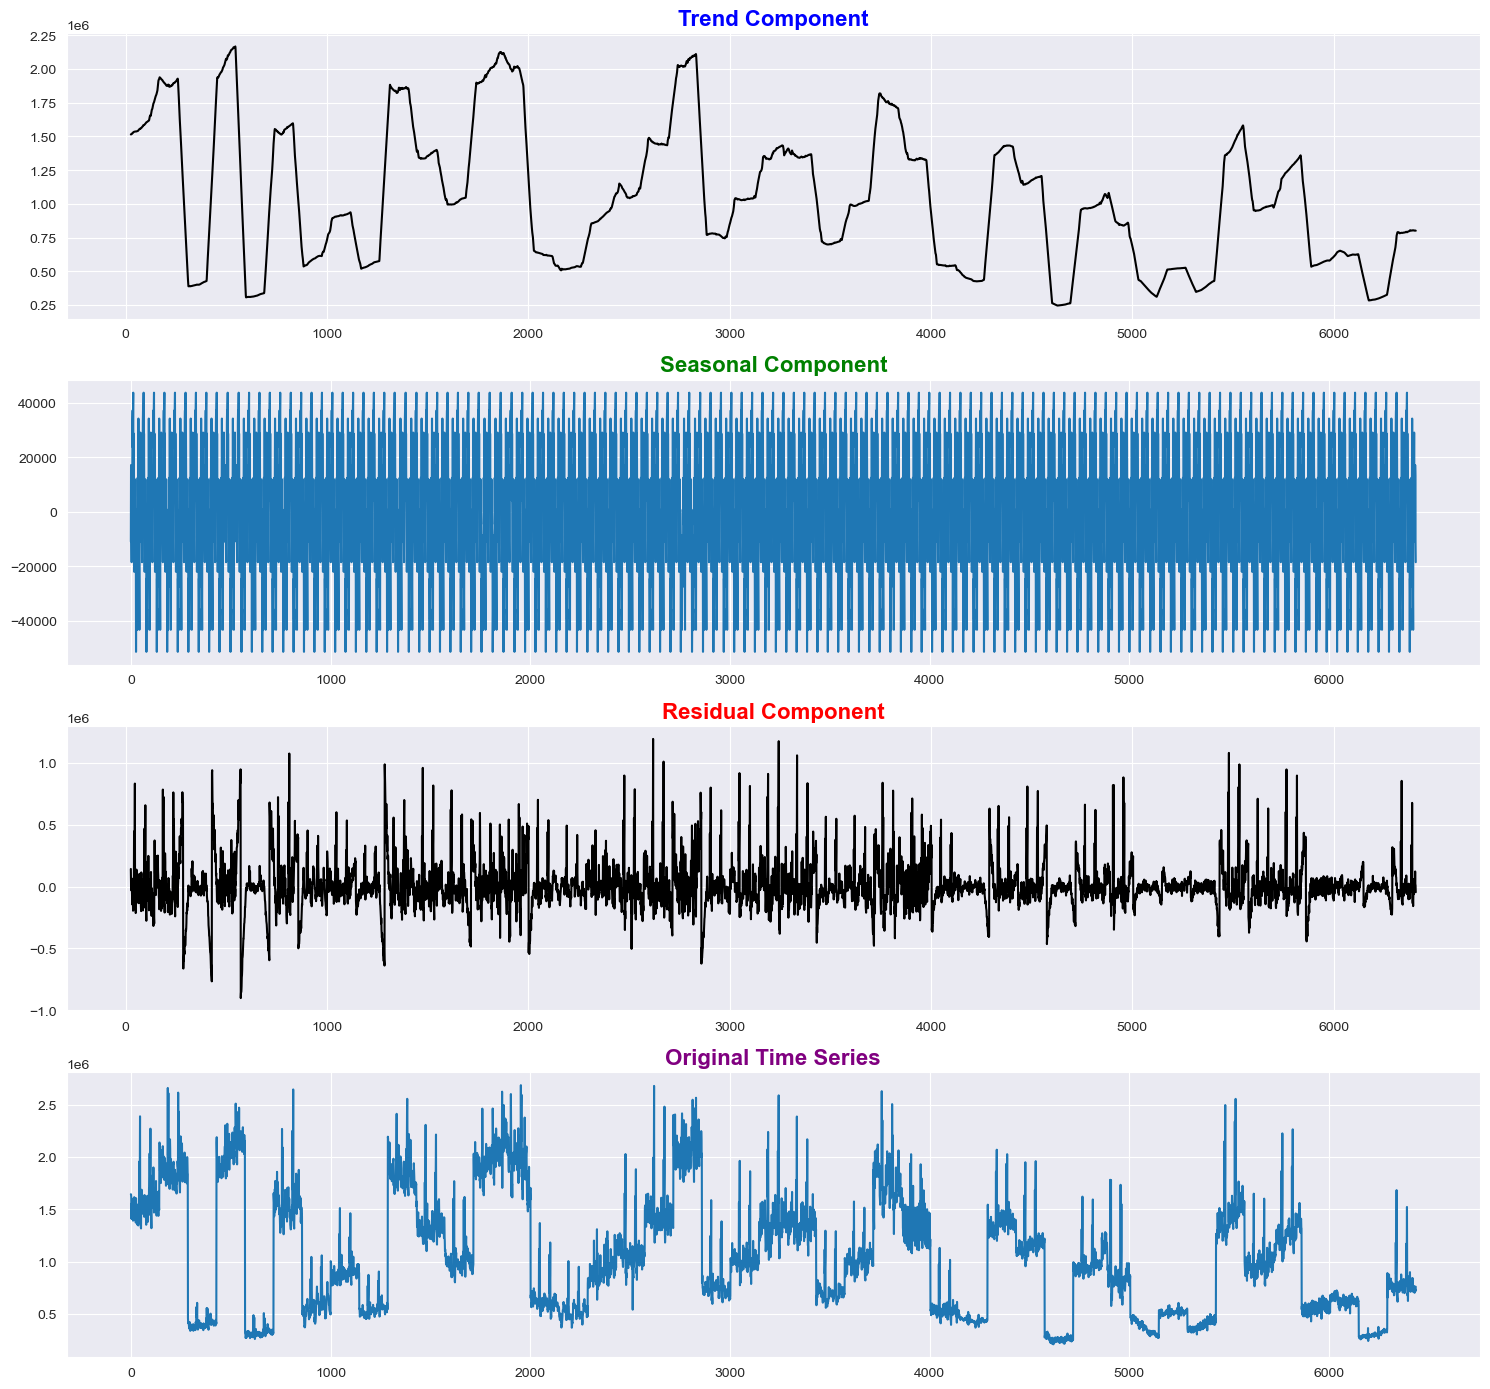

In [20]:
result = seasonal_decompose(df['Weekly_Sales'], model='additive', period=52)  # Assuming a yearly seasonality (52 weeks)
sns.set_style('darkgrid')
# Visualize the decomposed components with custom font sizes and colors
plt.figure(figsize=(15, 14))

plt.subplot(4, 1, 1)
plt.plot(result.trend, label='Trend',color = 'black')
plt.title('Trend Component', fontsize=16,fontweight='bold', color='blue')

plt.subplot(4, 1, 2)
plt.plot(result.seasonal, label='Seasonal')
plt.title('Seasonal Component', fontsize=16, fontweight='bold',color='green')
plt.subplot(4, 1, 3)
plt.plot(result.resid, label='Residual',color = 'black')
plt.title('Residual Component', fontsize=16,fontweight='bold',color='red')

plt.subplot(4, 1, 4)
plt.plot(df['Weekly_Sales'], label='Original')
plt.title('Original Time Series', fontsize=16,fontweight='bold', color='purple')

plt.tight_layout()
plt.show()

<font color="bluish-green"> Weather Influence:</font>

**Does temperature affect the Weekly_Sales in any manner?**

<Figure size 1000x600 with 0 Axes>

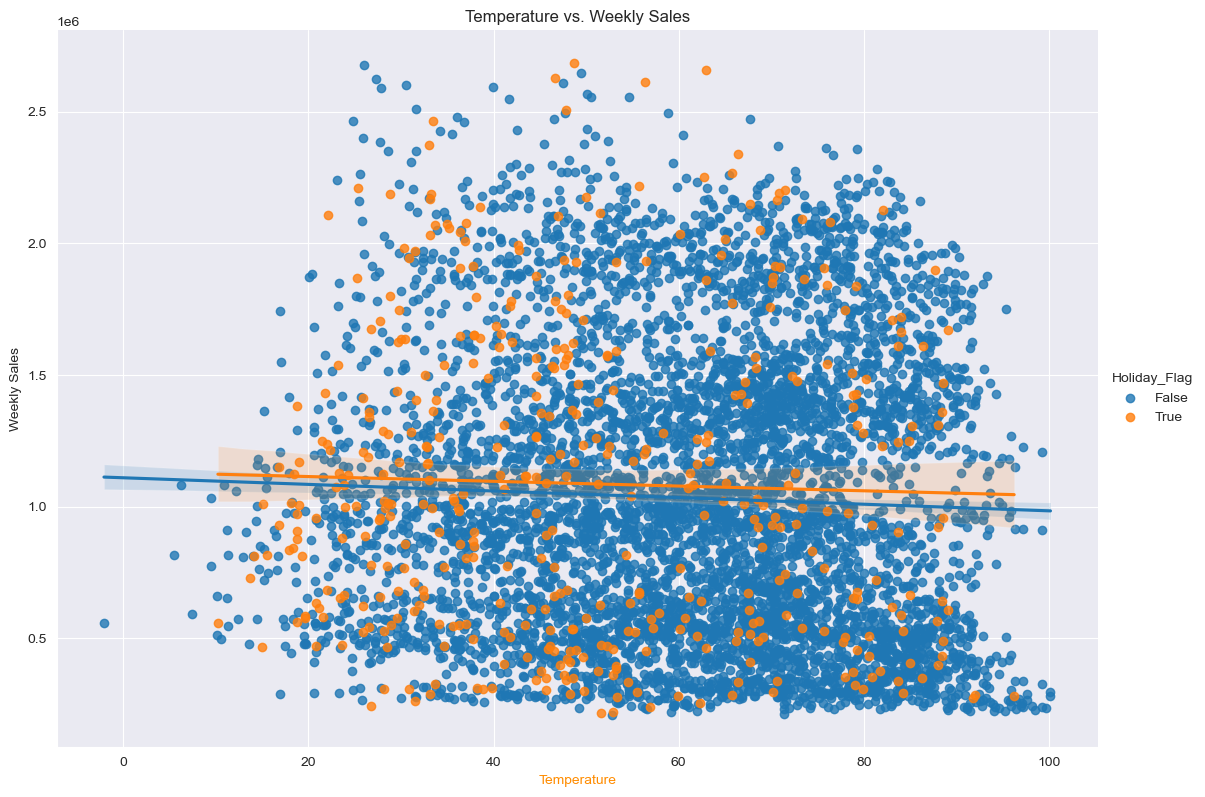

In [21]:
sns.set_style('darkgrid')
plt.figure(figsize=(10, 6))
sns.lmplot(x='Temperature', y='Weekly_Sales', data=df, hue='Holiday_Flag',height=8, aspect=1.4)
plt.title('Temperature vs. Weekly Sales')
plt.xlabel('Temperature',color='#FF8C00')
plt.ylabel('Weekly Sales')
plt.show()

In [22]:
# Calculate correlation coefficient
correlation = df['Temperature'].corr(df['Weekly_Sales'])
print(f'Correlation between Temperature and Weekly Sales: {correlation}')

Correlation between Temperature and Weekly Sales: -0.044340183351095123


<font color="Bluish-red"><h4>Changes in Temperature over time</font>

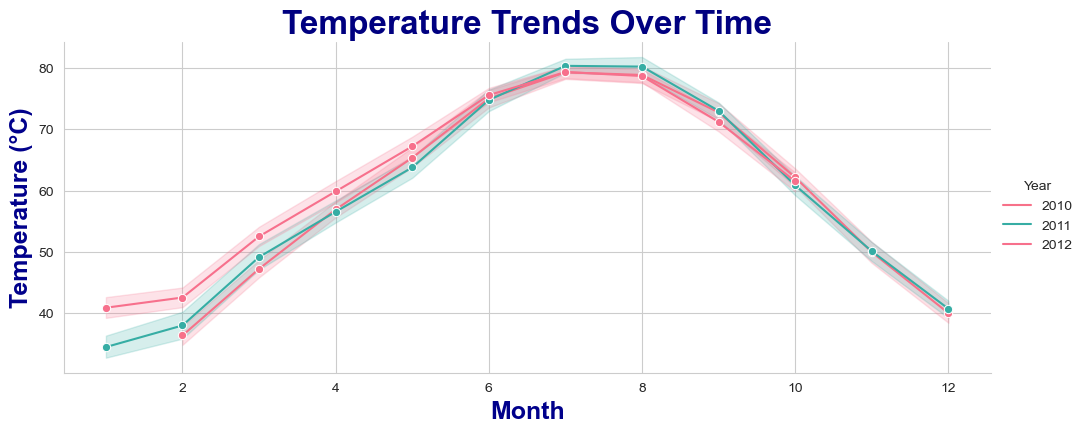

In [23]:
sns.set_style('whitegrid')

# Create a line plot for changes in Temperature over Time
sns.relplot(data=df, x='Month', y='Temperature', hue='Year',
            kind='line', height=4, aspect=2.5, palette='husl',
            marker='o')

# Set the title
plt.title('Temperature Trends Over Time', fontdict={'fontsize': 24, 'color': 'navy', 'fontweight': 'bold'})

# Set the x and y axis labels using Seaborn's functions
plt.xlabel('Month', color='darkblue', fontweight='bold', fontsize=18)
plt.ylabel('Temperature (°C)', color='darkblue', fontweight='bold', fontsize=18)

plt.show()

<font color="Green"><h4>Consumer Price Index (CPI) affecting the Weekly_Sales</font>


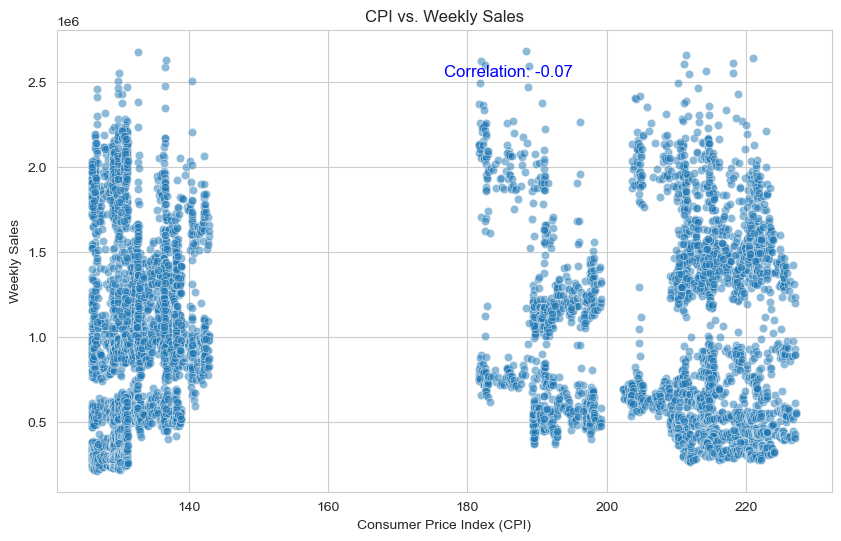

In [24]:
correlation = df['CPI'].corr(df['Weekly_Sales'])

# Scatter plot of CPI vs. Weekly Sales
plt.figure(figsize=(10, 6))
sns.scatterplot(x='CPI', y='Weekly_Sales', data=df, alpha=0.5)
plt.title('CPI vs. Weekly Sales')
plt.xlabel('Consumer Price Index (CPI)')
plt.ylabel('Weekly Sales')

# Display correlation coefficient
plt.text(0.5, 0.9, f'Correlation: {correlation:.2f}', transform=plt.gca().transAxes, fontsize=12, color='blue')

plt.show()

<font color="#0000CD"><h4>How is the Consumer Price index (CPI) affecting the Weekly_Sales of various Stores?</font>


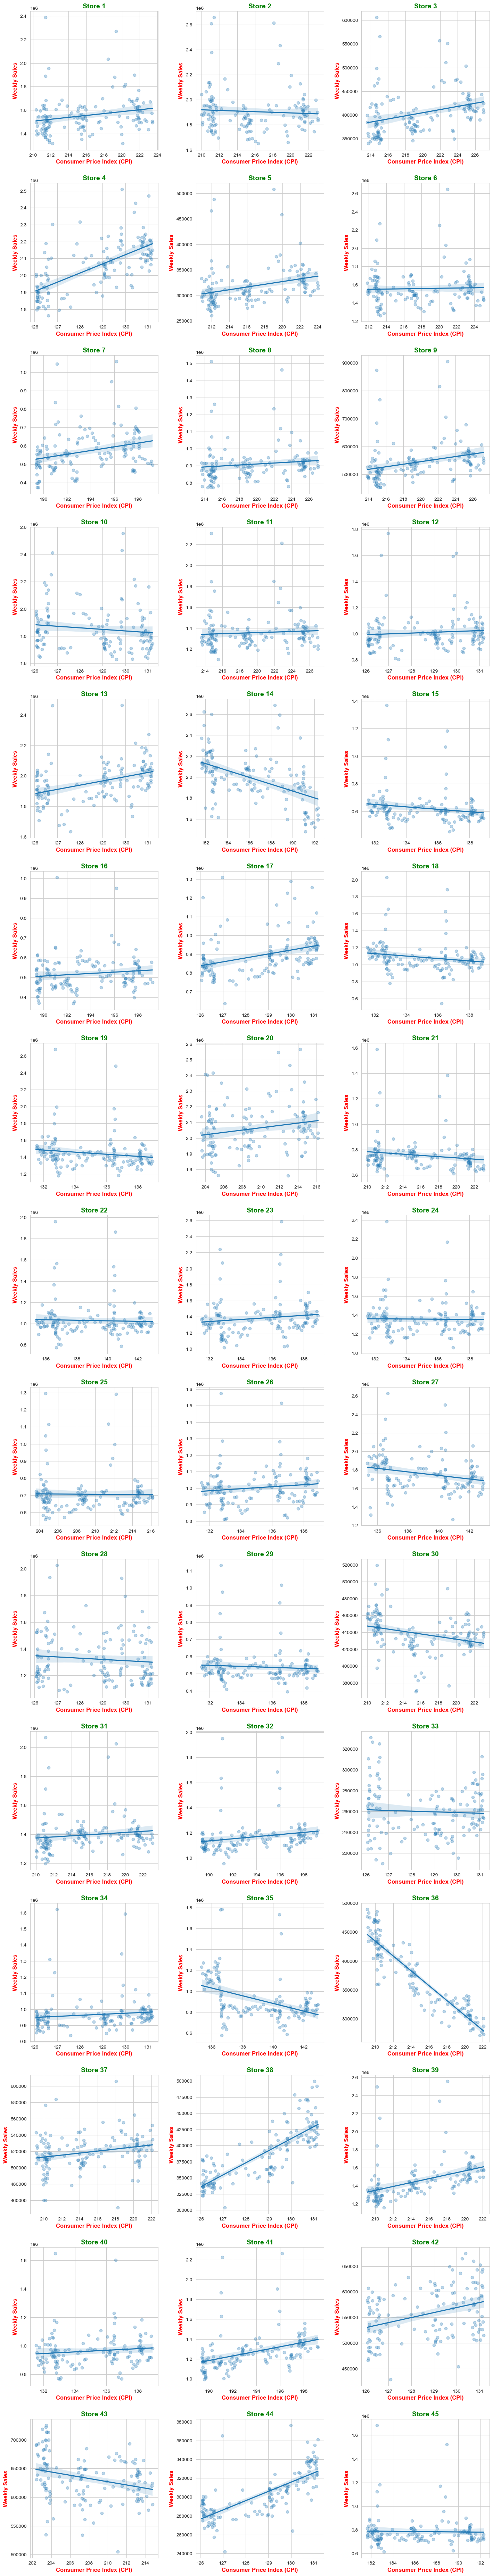

In [25]:
stores = df['Store'].unique()

# Set up subplots
fig, axes = plt.subplots(nrows=len(stores)//3, ncols=3, figsize=(15, 5*len(stores)//3))
fig.tight_layout(pad=5.0)

# Iterate over each store and create a scatter plot
for i, store_num in enumerate(stores):
    row = i // 3
    col = i % 3
    ax = axes[row, col]

    # Filter the data for the specific store
    store_data = df[df['Store'] == store_num]

    # Plot scatter plot with regression line
    sns.set_style('whitegrid')
    sns.regplot(x='CPI', y='Weekly_Sales', data=store_data, ax=ax, scatter_kws={'alpha':0.3})

    ax.set_title(f'Store {store_num}', fontdict={'fontsize': 14, 'color': 'Green', 'fontweight': 'bold'})
    ax.set_xlabel('Consumer Price Index (CPI)', color='red', fontweight='bold', fontsize=12)
    ax.set_ylabel('Weekly Sales', color='red', fontweight='bold', fontsize=12)

plt.show()

# <font color = 'Blue'></h3>Average Fuel Prices Over the Years</font>

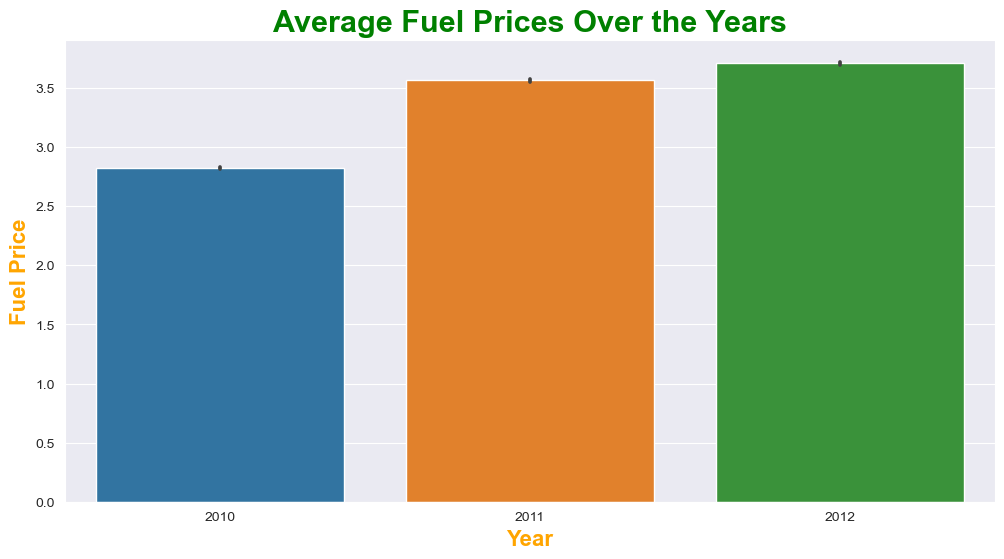

In [26]:
sns.set_style('darkgrid')
plt.figure(figsize=(12,6))
sns.barplot(data = df,x = 'Year',y = 'Fuel_Price')

# Set the title
plt.title('Average Fuel Prices Over the Years', fontdict={'fontsize':22,'color':'Green','fontweight':'bold'})

# Set the x and y axis labels
plt.xlabel('Year', color='orange',fontweight='bold', fontsize=16)
plt.ylabel('Fuel Price', color='orange',fontweight='bold', fontsize=16)

plt.show()

# Yearly Sales Distribution by Store

C:\Users\ANKITA\AppData\Local\Temp\ipykernel_24780\1278120959.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Year', y='Weekly_Sales', hue='Store', palette='viridis', ci=None)


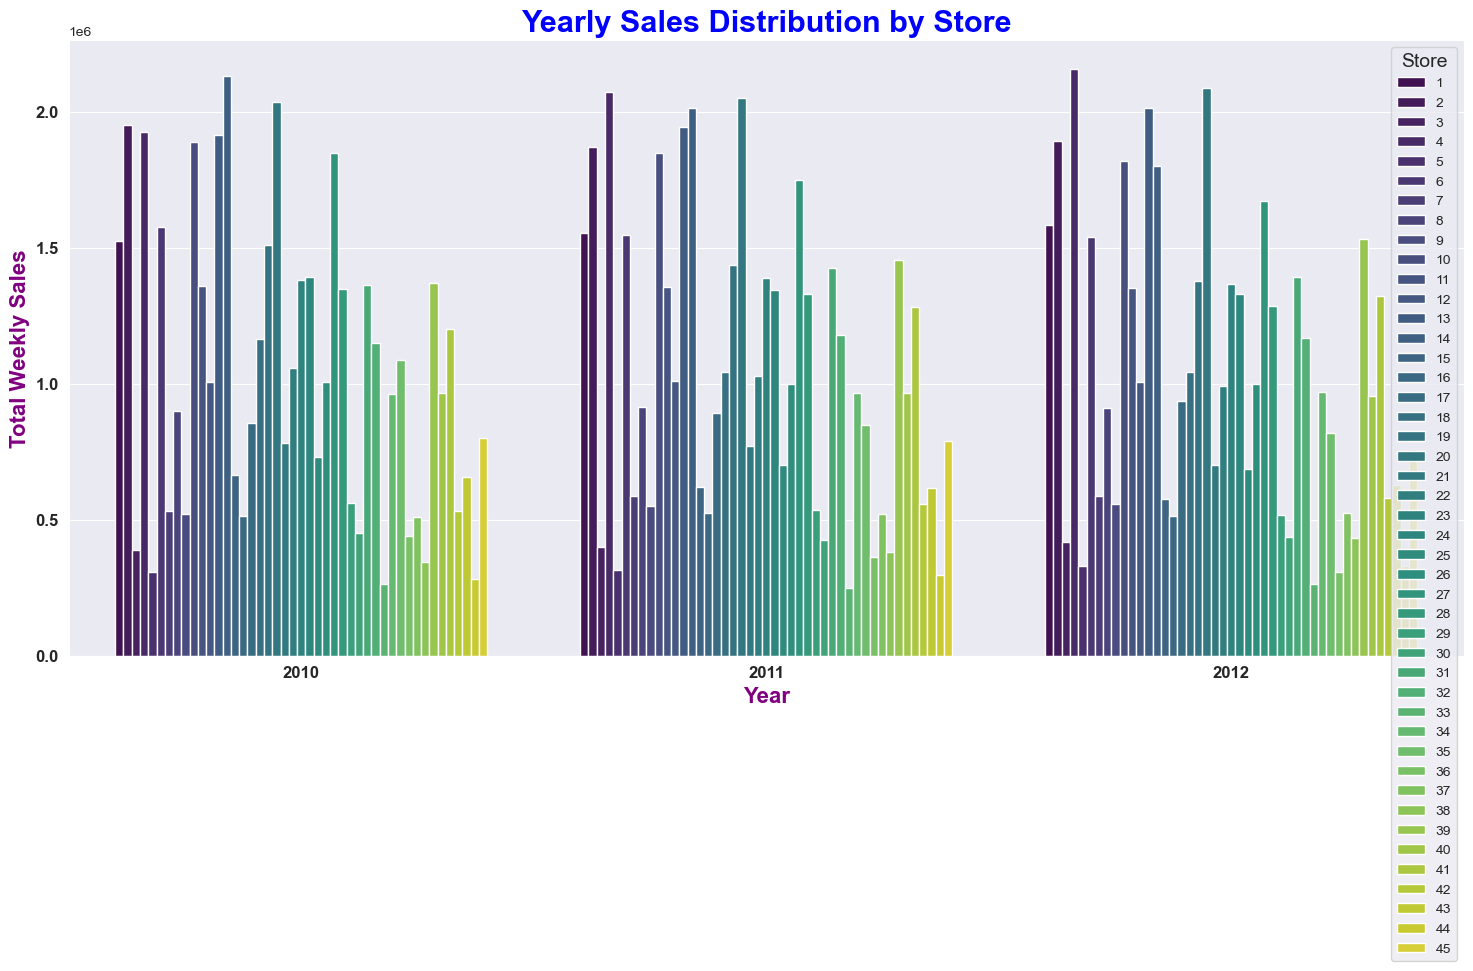

In [27]:
plt.figure(figsize=(18, 8))
sns.set_style('darkgrid')
sns.barplot(data=df, x='Year', y='Weekly_Sales', hue='Store', palette='viridis', ci=None)

# Set the title
plt.title('Yearly Sales Distribution by Store', fontdict={'fontsize': 22, 'color': 'blue', 'fontweight': 'bold'})

# Set the x and y axis labels
plt.xlabel('Year', color='purple', fontweight='bold', fontsize=16)
plt.ylabel('Total Weekly Sales', color='purple', fontweight='bold', fontsize=16)
plt.xticks(fontweight='bold', fontsize=12)
plt.yticks(fontweight='bold', fontsize=12)
plt.legend(title='Store', title_fontsize='14', loc='upper right')
plt.show()


<font color="Orange"><h4>TOP Performing Stores according to the historical data</font>

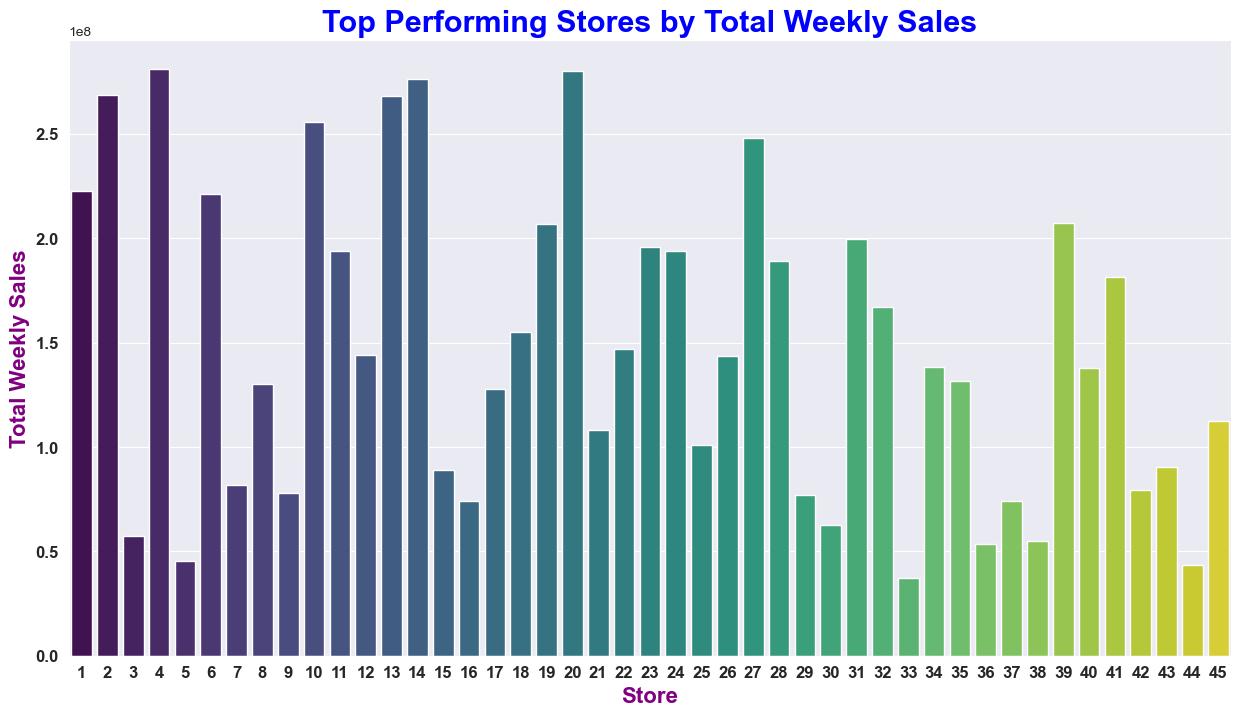

In [28]:
total_sales_by_store = df.groupby('Store')['Weekly_Sales'].sum().reset_index()

# Sort stores by total weekly sales in descending order
top_performing_stores = total_sales_by_store.sort_values(by='Weekly_Sales', ascending=False)

# Visualize the top-performing stores
plt.figure(figsize=(15, 8))
sns.barplot(data=top_performing_stores, x='Store', y='Weekly_Sales', palette='viridis')

# Set the title
plt.title('Top Performing Stores by Total Weekly Sales', fontdict={'fontsize': 22, 'color': 'blue', 'fontweight': 'bold'})

# Set the x and y axis labels
plt.xlabel('Store', color='purple', fontweight='bold', fontsize=16)
plt.ylabel('Total Weekly Sales', color='purple', fontweight='bold', fontsize=16)
plt.xticks(fontweight='bold', fontsize=12)
plt.yticks(fontweight='bold', fontsize=12)
plt.show()

<font color="Orange"><h4> Worst Performing Stores according to the historical data</font>

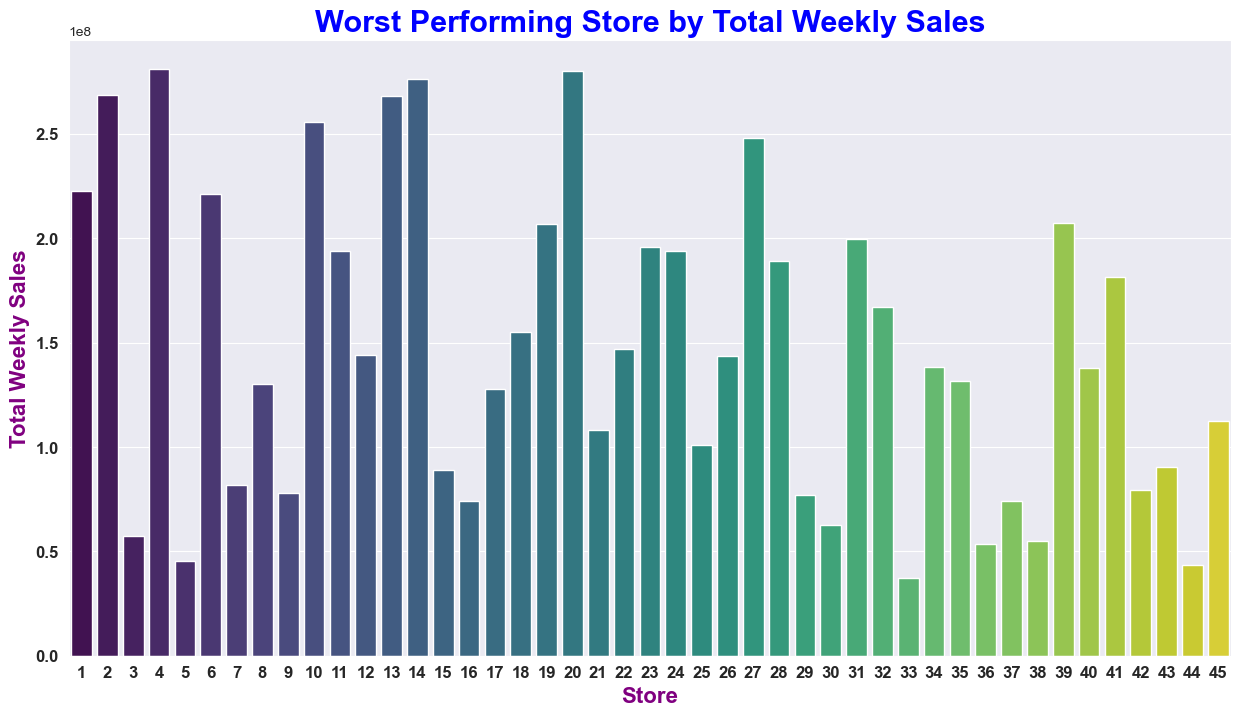

In [29]:
total_sales_by_store = df.groupby('Store')['Weekly_Sales'].sum().reset_index()

# Identify the worst-performing store(s)
worst_performing_store = total_sales_by_store.sort_values(by='Weekly_Sales').iloc[0]

plt.figure(figsize=(15, 8))
sns.barplot(data=total_sales_by_store, x='Store', y='Weekly_Sales', palette='viridis')

# Set the title
plt.title('Worst Performing Store by Total Weekly Sales', fontdict={'fontsize': 22, 'color': 'blue', 'fontweight': 'bold'})

# Set the x and y axis labels
plt.xlabel('Store', color='purple', fontweight='bold', fontsize=16)
plt.ylabel('Total Weekly Sales', color='purple', fontweight='bold', fontsize=16)
plt.xticks(fontweight='bold', fontsize=12)
plt.yticks(fontweight='bold', fontsize=12)

plt.show()

<font color="Blue"><h4>How significant is the difference between the HIGHEST and LOWEST Performing Stores</font>

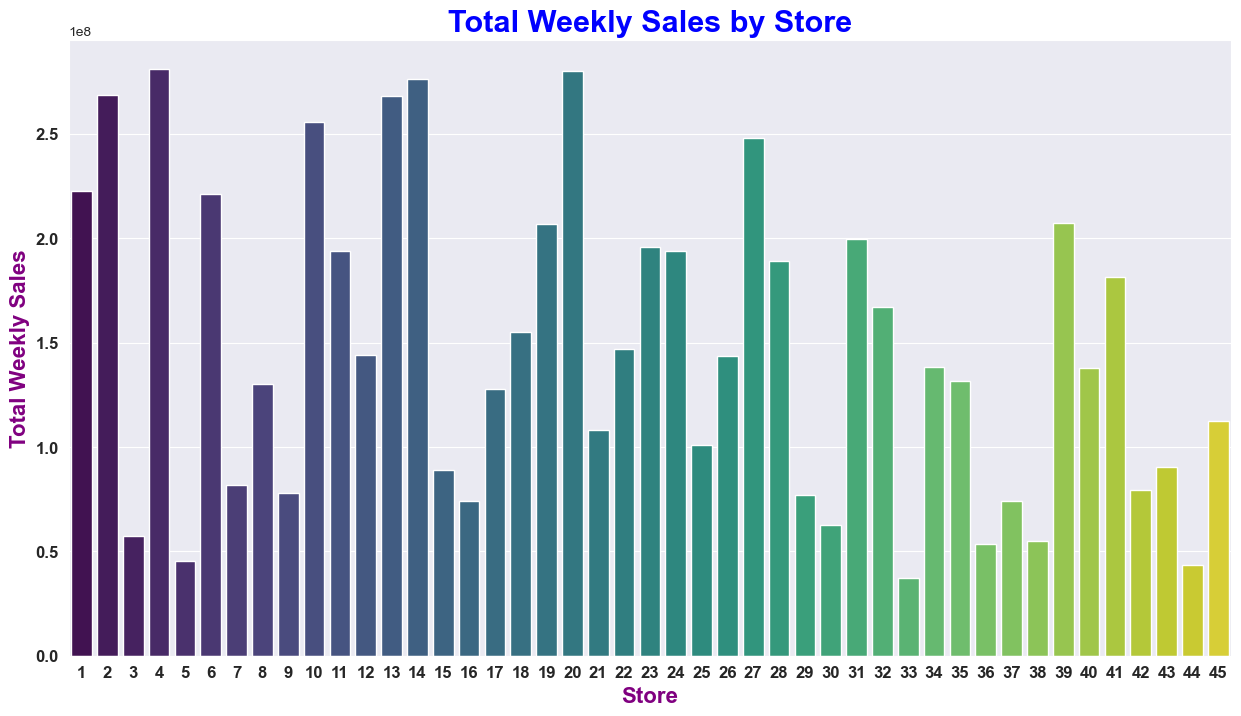

The difference between the highest and lowest performing stores is 243875002.96


In [30]:
total_sales_by_store = df.groupby('Store')['Weekly_Sales'].sum().reset_index()

# Identify the highest and lowest performing stores
highest_performing_store = total_sales_by_store.sort_values(by='Weekly_Sales', ascending=False).iloc[0]
lowest_performing_store = total_sales_by_store.sort_values(by='Weekly_Sales').iloc[0]

# Calculate the difference in total weekly sales
difference = highest_performing_store['Weekly_Sales'] - lowest_performing_store['Weekly_Sales']

# Visualize the performance of all stores
plt.figure(figsize=(15, 8))
sns.barplot(data=total_sales_by_store, x='Store', y='Weekly_Sales', palette='viridis')
plt.title('Total Weekly Sales by Store', fontdict={'fontsize': 22, 'color': 'blue', 'fontweight': 'bold'})

# Set the x and y axis labels
plt.xlabel('Store', color='purple', fontweight='bold', fontsize=16)
plt.ylabel('Total Weekly Sales', color='purple', fontweight='bold', fontsize=16)
plt.xticks(fontweight='bold', fontsize=12)
plt.yticks(fontweight='bold', fontsize=12)

plt.show()

# Print the results
print(f"The difference between the highest and lowest performing stores is {difference}")


In [31]:
# Function to calculate and print statistics
def calculate_and_print_stats(df, year):
    sales = df[df['Year'] == year]['Weekly_Sales']
    stats = {
        'Range': np.ptp(sales),
        'Average Sales': sales.mean(),
        'Standard Deviation': sales.std(),
        'Relative Variance': (sales.std() / sales.mean()) * 100,
        '25th Percentile': sales.quantile(0.25),
        '75th Percentile': sales.quantile(0.75)
    }

    print(f'Stats for Yearly Sales in the year {year}:')
    for stat_name, stat_value in stats.items():
        print(f'{stat_name}: {stat_value}')

# Calculate and print statistics for each year
calculate_and_print_stats(df, 2010)
calculate_and_print_stats(df, 2011)
calculate_and_print_stats(df, 2012)


Stats for Yearly Sales in the year 2010:
Range: 2468220.17
Average Sales: 1040918.8612710282
Standard Deviation: 550345.9686737205
Relative Variance: 52.871168844199154
25th Percentile: 540033.2424999999
75th Percentile: 1401077.5924999998
Stats for Yearly Sales in the year 2011:
Range: 2469992.6
Average Sales: 1033779.5230094583
Standard Deviation: 547685.786835313
Relative Variance: 52.978974205344365
25th Percentile: 553834.775
75th Percentile: 1416259.9075
Stats for Yearly Sales in the year 2012:
Range: 2328339.4299999997
Average Sales: 1033660.3924289405
Standard Deviation: 536653.4558293124
Relative Variance: 51.91777297070082
25th Percentile: 558529.365
75th Percentile: 1426382.955


**<h3>Distribution graph of columns**

 <font color='orange'><h5>Temperature </font>


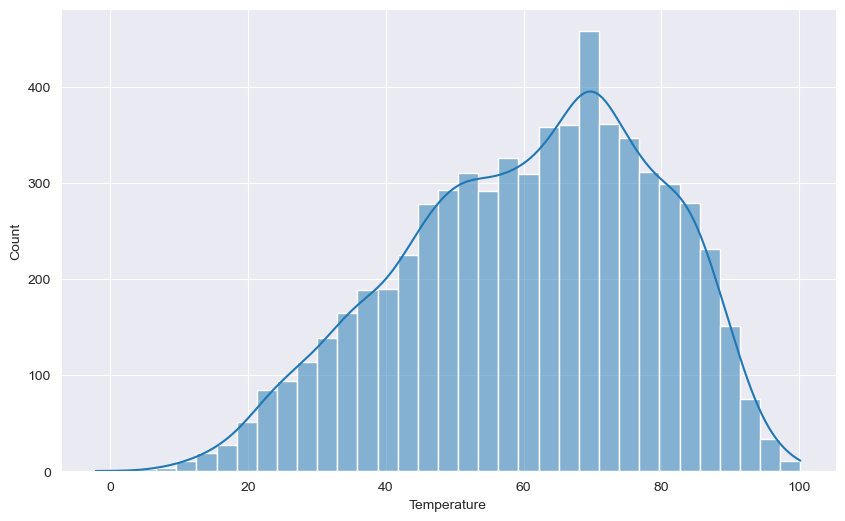

In [32]:
plt.figure(figsize=(10,6))
sns.histplot(df['Temperature'], kde=True)
plt.show()

<font color='orange'><h5> Fuel_Price </font>

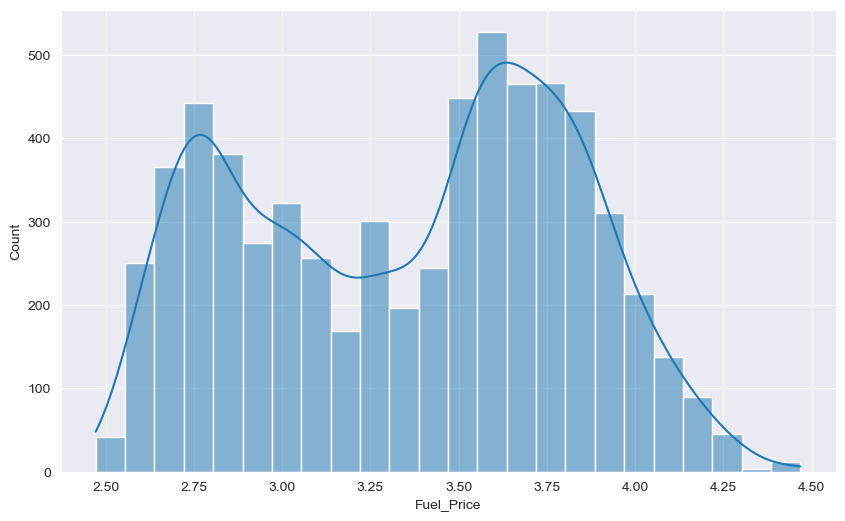

In [33]:
plt.figure(figsize=(10,6))
sns.histplot(df['Fuel_Price'], kde=True)
plt.show()

<font color='orange'><h5> CPI </font>

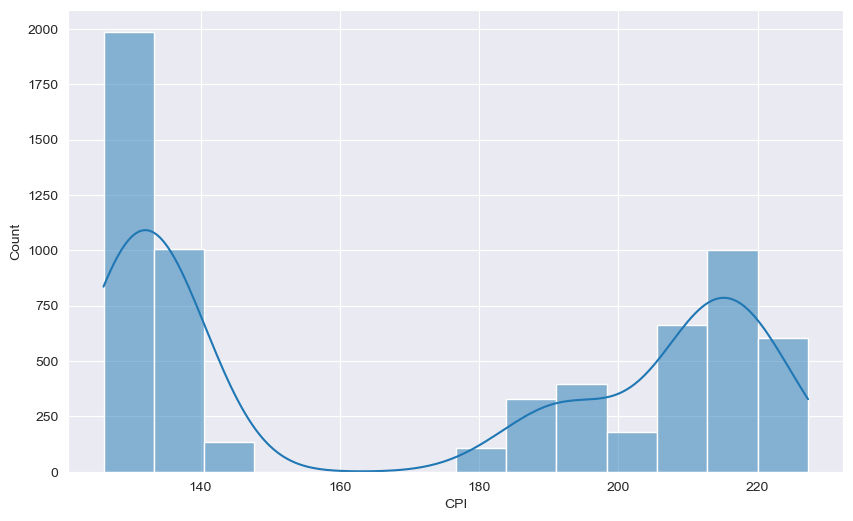

In [34]:
plt.figure(figsize=(10,6))
sns.histplot(df['CPI'],kde = True)
plt.show()

<font color='orange'><h5> Unemployment </font>

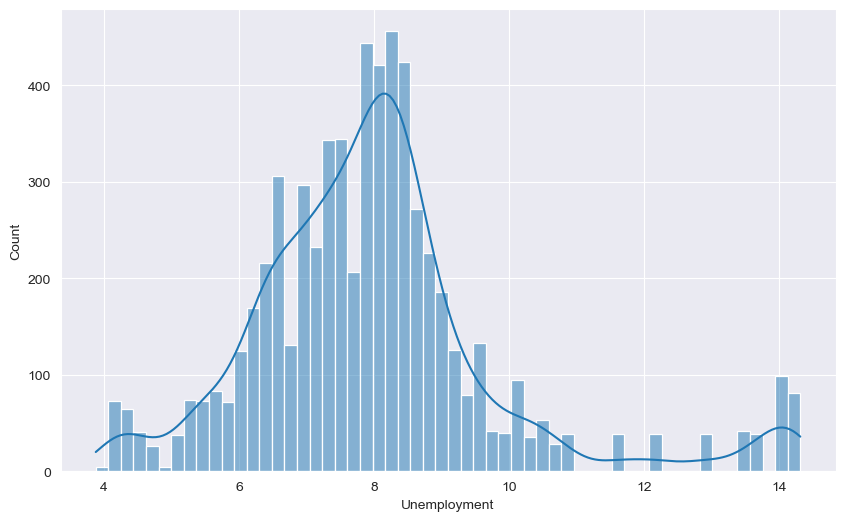

In [35]:
plt.figure(figsize=(10,6))
sns.histplot(df['Unemployment'],kde = True)
plt.show()

In [36]:
df.skew(numeric_only=True)


Weekly_Sales    0.497428
Holiday_Flag    3.405021
Temperature    -0.344571
Fuel_Price     -0.101046
CPI             0.061319
Unemployment    1.186512
Year            0.057389
Week            0.053345
Month           0.042542
dtype: float64

**<h3>VIF check for multicolinearity**

In [37]:
columns_to_exclude = ['Weekly_Sales', 'Store', 'Holiday_Flag', 'Date']

X_columns = [col for col in df.columns if col not in columns_to_exclude]

X = df[X_columns]
y = df['Weekly_Sales']


In [38]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

try:
    # Calculating VIF for each feature
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
except Exception as e:
    print(f"Error calculating VIF: {e}")
    vif_data["VIF"] = np.nan  # Set a placeholder value or handle the error as needed

# Print the VIF data
print(vif_data)


Error calculating VIF: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''
        feature  VIF
0   Temperature  NaN
1    Fuel_Price  NaN
2           CPI  NaN
3  Unemployment  NaN
4          Year  NaN
5          Week  NaN
6         Month  NaN


  <font color="orange"><h4>Insights from distribution and skewness for selection of transformers </font>
    
   <font color="black"><h5>Temprature & Fuel need PowerTransformer</font>
         
   <font color="black"><h5>Unemployment needs FunctionTransformer</font>
            
   <font color="reddish-brown"><h5>To select features we need to do a statistical assement to remove multicollinear columns</font>

In [39]:
import statsmodels.api as sm

X = df[['Temperature', 'Fuel_Price', 'CPI', 'Unemployment']]
y = df['Weekly_Sales']

# Add a constant term to the independent variables matrix
X = sm.add_constant(X)

# Fit the Ordinary Least Squares (OLS) model
model = sm.OLS(y, X).fit()

# Print the summary of the regression
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           Weekly_Sales   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     36.53
Date:                Mon, 18 Dec 2023   Prob (F-statistic):           3.06e-30
Time:                        21:29:50   Log-Likelihood:                -93560.
No. Observations:                6401   AIC:                         1.871e+05
Df Residuals:                    6396   BIC:                         1.872e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1.651e+06   7.72e+04     21.378   

<font color="red"><h4>We will select models which are robust to multicollinearity or handle it gracefully </font>
    
    
<font color="blue"><h5>Decision Tree</font>
    
<font color="#000000"><h5>Random Forest</font>
    
<font color="blue"><h5>XGBoost</font>

In [40]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score

# Assuming df is your DataFrame
X = df[['Temperature', 'Fuel_Price', 'CPI', 'Unemployment']]
y = df['Weekly_Sales']

# Define the ColumnTransformer for preprocessing
column_transformer = ColumnTransformer(
    transformers=[
        ('numeric', 'passthrough', ['Temperature', 'Fuel_Price', 'CPI', 'Unemployment']),
        # Add more transformers as needed
    ],
    remainder='drop'  # Drop any columns not explicitly mentioned
)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Define models and hyperparameter grids
models = {
    'Decision Tree': (DecisionTreeRegressor(), {'model__max_depth': [None, 5, 10, 15]}),
    'Random Forest': (RandomForestRegressor(), {'model__n_estimators': [10, 50, 100], 'model__max_depth': [None, 5, 10]}),
    'XGBoost': (XGBRegressor(), {'model__n_estimators': [50, 100, 200], 'model__max_depth': [3, 5, 7]})
}

# Loop through models
results_df = pd.DataFrame(columns=['Model', 'y_test', 'y_pred', 'R2 Score'])
for model_name, (model, param_grid) in models.items():
    pipeline = Pipeline([
        ('preprocessing', column_transformer),
        ('model', model),
    ])
    grid_search = GridSearchCV(pipeline, param_grid, scoring='r2', cv=5, n_jobs=-1)
    grid_search.fit(X_train, y_train)
    y_pred = grid_search.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    
    new_row = {'Model': model_name, 'y_test': y_test.values, 'y_pred': y_pred, 'R2 Score': r2}
    results_df = pd.concat([results_df, pd.DataFrame([new_row])], ignore_index=True)
    
    print(f"{model_name} - Best Hyperparameters: {grid_search.best_params_}, Best R-squared: {grid_search.best_score_}")

# Now, results_df contains the evaluation results for each model


Decision Tree - Best Hyperparameters: {'model__max_depth': 5}, Best R-squared: 0.12257842173929798
Random Forest - Best Hyperparameters: {'model__max_depth': 10, 'model__n_estimators': 100}, Best R-squared: 0.2375972975207775
XGBoost - Best Hyperparameters: {'model__max_depth': 3, 'model__n_estimators': 200}, Best R-squared: 0.2728792078544361


In [41]:
results_df

Model                                             y_test  \
0  Decision Tree  [1054454.4, 1591920.42, 1415473.91, 498580.87,...   
1  Random Forest  [1054454.4, 1591920.42, 1415473.91, 498580.87,...   
2        XGBoost  [1054454.4, 1591920.42, 1415473.91, 498580.87,...   

                                              y_pred  R2 Score  
0  [1149844.0575848192, 958434.9703816788, 118525...  0.140950  
1  [1060316.9619250349, 1115037.9433673052, 10853...  0.271520  
2  [1003550.0, 1000854.0, 900920.75, 1105952.2, 1...  0.321838

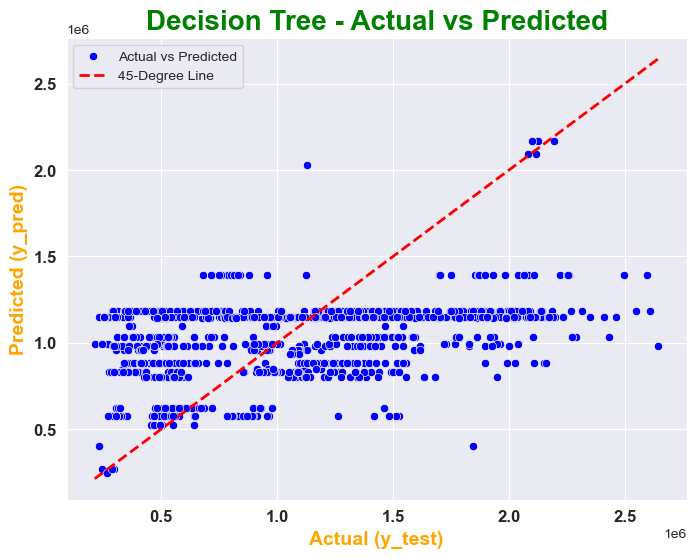

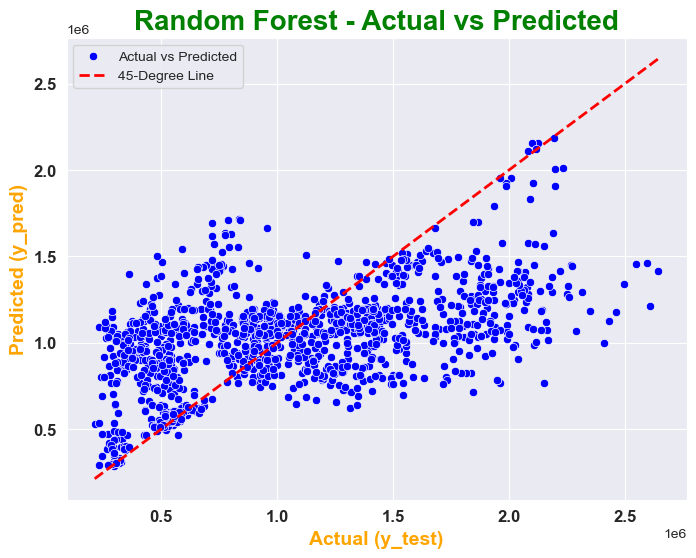

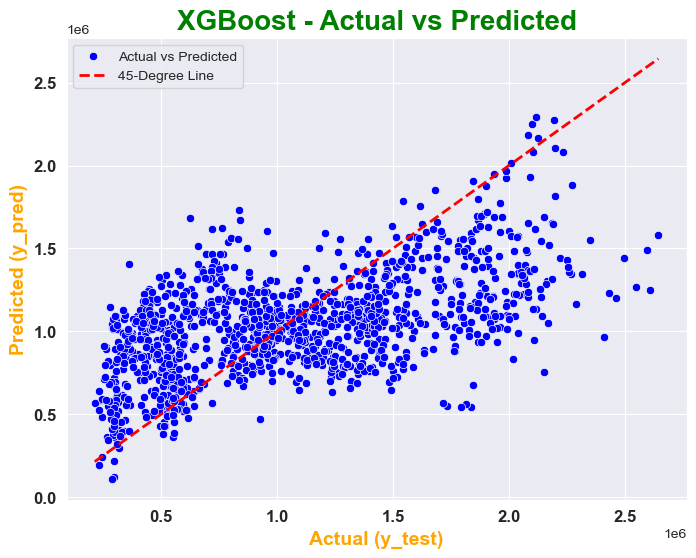

In [42]:
for i, row in results_df.iterrows():
    plt.figure(figsize=(8, 6))
    
    # Scatter plot with a 45-degree reference line
    sns.scatterplot(x=row['y_test'], y=row['y_pred'], color='blue', label='Actual vs Predicted')
    plt.plot([min(row['y_test']), max(row['y_test'])], [min(row['y_test']), max(row['y_test'])], color='red', linestyle='--', linewidth=2, label='45-Degree Line')

    plt.title(f"{row['Model']} - Actual vs Predicted", fontdict={'fontsize': 20, 'color': 'Green', 'fontweight': 'bold'})
    plt.xlabel('Actual (y_test)', fontdict={'fontsize': 14, 'color': 'orange', 'fontweight': 'bold'})
    plt.ylabel('Predicted (y_pred)', fontdict={'fontsize': 14, 'color': 'orange', 'fontweight': 'bold'})
    plt.xticks(fontweight='bold', fontsize=12)
    plt.yticks(fontweight='bold', fontsize=12)
    plt.legend()
    plt.show()

<font color="Dark Yellow"><h2>FORECAST the Weekly_Sales for each Stores for the NEXT 12 WEEKS.</font>

<font color="Green"><h4>Time Series for foracsting </font>
        
    

In [43]:
import plotly.graph_objects as go
from statsmodels.tsa.seasonal import seasonal_decompose

# Assuming df_Walmart is your DataFrame with a datetime index
y = df['Weekly_Sales']

# Perform seasonal decomposition
result = seasonal_decompose(y, model='additive', period=52)

# Create a subplot with shared x-axis
fig = go.Figure()

# Plot the observed series
fig.add_trace(go.Scatter(x=y.index, y=result.observed, mode='lines', name='Observed'))

# Plot the trend component
fig.add_trace(go.Scatter(x=y.index, y=result.trend, mode='lines', name='Trend'))

# Plot the seasonal component
fig.add_trace(go.Scatter(x=y.index, y=result.seasonal, mode='lines', name='Seasonal'))

# Plot the residual component
fig.add_trace(go.Scatter(x=y.index, y=result.resid, mode='lines', name='Residual'))

# Set layout properties
fig.update_layout(title='Time Series Decomposition',
                  xaxis_title='Date',
                  yaxis_title='Value',
                  height=800,
                  width=1200,
                  template='plotly_dark')

# Show the plot
fig.show()


# <font color = 'brown'> <h3> Future Possibilities of Walmart</font>

1. **Innovative Predictive Modeling**:
    While the existing models like Decision Tree, Random Forest, and XGBoost have demonstrated satisfactory outcomes, there's room for exploration into cutting-edge predictive models. Future endeavors may involve delving into advanced techniques such as ensemble learning, deep neural networks, and sophisticated time series models like Prophet or Exponential Smoothing.

2. **Diverse Feature Engineering**: 
    Elevate model accuracy by incorporating an array of new features or engineered variables. This could entail integrating insights from social media trends, weather patterns, or customer sentiment, providing a more nuanced understanding of the intricate dynamics influencing sales.

3. **Precision in Model Tuning**: 
    Fine-tuning models remains an ongoing process for optimal performance. Delve into meticulous hyperparameter tuning using advanced optimization methods like genetic algorithms or simulated annealing to extract the best possible configurations for model efficiency.

4. **Agile Inventory Strategies**: 
    Leverage acquired insights to dynamically optimize inventory management. Adapting strategies based on external factors such as supplier reliability, geopolitical events, or emerging market trends can enable Walmart to navigate demand fluctuations adeptly.

5. **Real-Time Fusion of Data Streams**: 
    Integrate real-time data seamlessly into the analytics framework. By harnessing the power of constantly updated information, Walmart can swiftly pivot its strategies in response to evolving economic conditions, shifts in consumer behavior, or unexpected external events.

6. **Spatial Intelligence**: 
    Uncover the spatial dimension of sales dynamics through geospatial analysis. Understanding the interplay of location-specific factors like local demographics, traffic patterns, and competitor proximity can be instrumental in optimizing store performance.

7. **Nuanced Customer Segmentation**: 
    Deepen the understanding of customer behavior by refining segmentation strategies. Utilize sophisticated analytics to tailor marketing initiatives and sales approaches for diverse consumer groups based on intricate patterns in purchasing behavior, demographics, and preferences.

8. **Enhanced Personalization through AI**: Infuse collaborative filtering with advanced artificial intelligence techniques to deliver unparalleled personalized recommendations to customers. By leveraging machine learning algorithms, Walmart can elevate the customer shopping experience and potentially catalyze increased sales through tailored product suggestions.

9. **Dynamic Analytics Dashboard**: Create a dynamic, real-time dashboard that offers a visual representation of predicted versus actual sales. This tool would not only showcase key performance indicators but also empower stakeholders to swiftly discern emerging trends or anomalies, facilitating timely and informed decision-making.

By consistently refining models, integrating diverse data sources, and embracing cutting-edge analytics, Walmart can maintain a competitive edge in the retail landscape and make strategic, data-driven decisions that propel its sales forecasting efforts forward.

# <font color = 'brown'> <h3>Conclusion </font>

- The main purpose of this study was to predictWalmart’s sales based on the available historic data and identify whether factors like temperature, unemployment, fuel prices, etcaffect the weekly sales of particular stores under study. This study also aims to understand whether sales are relatively higher during holidays like Christmas and Thanksgiving than normal days so that stores can work on creating promotional offers that increase sales and generate higher revenue.


- Based on the insights derived from the exploratory data analysis, it is evident that Walmart sales exhibit a direct correlation with both store size and holiday seasons. Furthermore, an intriguing observation was made regarding store types, with Type A stores standing out as the top performers in terms of generating sales for Walmart. 


- In examining the specified variables in this analysis, namely temperature, unemployment, CPI, and fuel prices, it was noticed that sales exhibit a marginal increase during favorable weather conditions and when fuel prices are reasonable. However, it's essential to note the cautious stance due to the study's reliance on a relatively limited training dataset. Upon closer inspection during exploratory data analysis, it became apparent that sales tend to experience a relative uptick in periods of lower unemployment levels. Conversely, based on the dataset provided for this study, no discernible correlation was found between sales and the CPI index. Once again, it's imperative to approach these observations with prudence, considering the need for a more expansive training dataset containing additional information for making robust claims.


- The investigation of interaction effects played a crucial role in the decision tree model, aiming to discern whether the joint influence of various factors could impact Walmart's weekly sales. This exploration was prompted by the abundance of predictor variables present in the dataset. Although interaction effects were scrutinized across a combination of noteworthy variables, the findings indicated a statistically significant relationship solely among the independent variables of temperature, CPI, unemployment, and weekly sales (the predictor variable). It is essential to approach this conclusion with caution, recognizing the limitations imposed by the constrained scope of the training data, which may not provide definitive confirmation of these observed relationships.


- The exploration of relationships between independent and target variables involved employing various components of exploratory data analysis (EDA), such as the correlation matrix, scatter plots, feature importance plots generated by random forest and XG boosting models, and consideration of interaction effects. Despite the absence of noteworthy relationships between weekly sales and factors like temperature, fuel price, store size, and department in the correlation matrix , noteworthy associations were unveiled. Specifically, the feature importance plots derived from the XG boosting and random forest models highlighted significant relationships between weekly sales and store size, as well as department. The superior performance of these models compared to regression models strongly suggests the existence of a non-linear, statistically significant relationship between these independent and target variables.

# <font color = 'brown'> <h3>References</font>


1 . **Bakshi, C. (2020). Random forest regression.**
      https://levelup.gitconnected.com/random-forest-regression-209c0f354c84
     



2. **Bari, A., Chaouchi, M., & Jung, T. (n.d.). How to utilize linear regressions in predictive analytics.**
      https://www.dummies.com/programming/big-data/data-science/how-to-utilize-linear-regressions-in-predictive-analytics/



3. **Baum, D. (2011). How higher gas prices affect consumer behavior.**
     https://www.sciencedaily.com/releases/2011/05/110512132426.htm



4. **Brownlee, J. (2016). Feature importance and feature selection with xgboost in python.**
     https://machinelearningmastery.com/feature-importance-and-feature-selection-with-xgboost-in-python/



5. **Chouksey, P., & Chauhan, A. S. (2017). A review of weather data analytics using big data. International Journal of Advanced Research in Computer and Communication Engineering,**
     https://doi.org/https://ijarcce.com/upload/2017/january17/IJARCCE%2072.pdf



6. **Crown, M. (2016). Weekly sales forecasts using non-seasonal arima models.**
      https://mxcrown.com/walmart-sales-forecasting/




7. **Editor, M. B. (2013). Regression analysis: How do i interpret r-squared and assess the goodness-of-fit?**
    https://blog.minitab.com/en/adventures-in-statistics-2/regression-analysis-how-do-i-interpret-r-squared-and-assess-the-   goodness-offit

 
 
 
8. **Ellis, L. (2019). Simple eda in r with inspectdf.**
    https://www.r-bloggers.com/2019/05/part-2-simple-eda-in-r-with-inspectdf/




9. **Frost, J. (2021). Regression coefficients- statistics by jim.** 
     https://statisticsbyjim.com/glossary/regression-coefficient/




10. **Glen, S. (2016). Elementary statistics for the rest of us.**
    https://www.statisticshowto.com/correlation-matrix/




11. **Guide, U. B. A. R. P. (n.d.). Gradient boosting machines.**
  https://uc-r.github.io/gbm_regression
